In [1]:
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

# Load Data

In [8]:
features = ['vol2016', 'ac288', 'vol288', 'ac36', 'return', 'dv_36_288']
X_train, y_train, X_val, y_val, X_test, y_test = load_split("D:\\Dropbox\\My work\\krypl-project\\dataSplit\\return-01-within-day")
X_train, X_val, X_test = X_train[features], X_val[features], X_test[features]

# Test Train Validation Split

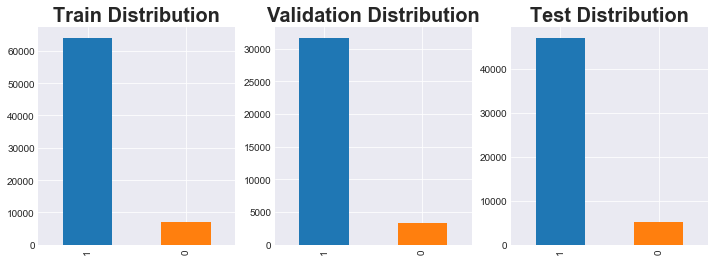

In [9]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font);

# Naive Bayes

In [10]:
import time
from modeling.gridsearch import GridSearch
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib


priors = [[i/100, (100 - i) / 100] for i in range(1, 100)]

params_to_train = {
    'priors': [None] + priors
}

grid_search = GridSearch(GaussianNB, params_to_train)
grid_search.fit_all(X_train, y_train)

path = "D:\\Dropbox\\My work\\krypl-project\\models\\return-01-within-day\\"
joblib.dump(grid_search, f'{path}\\bayes_search.pkl');

train [0/100] {'priors': None}........................... 0.09 sec
train [1/100] {'priors': [0.01, 0.99]}........................... 0.05 sec
train [2/100] {'priors': [0.02, 0.98]}........................... 0.05 sec
train [3/100] {'priors': [0.03, 0.97]}........................... 0.08 sec
train [4/100] {'priors': [0.04, 0.96]}........................... 0.05 sec
train [5/100] {'priors': [0.05, 0.95]}........................... 0.06 sec
train [6/100] {'priors': [0.06, 0.94]}........................... 0.05 sec
train [7/100] {'priors': [0.07, 0.93]}........................... 0.05 sec
train [8/100] {'priors': [0.08, 0.92]}........................... 0.06 sec
train [9/100] {'priors': [0.09, 0.91]}........................... 0.05 sec
train [10/100] {'priors': [0.1, 0.9]}........................... 0.05 sec
train [11/100] {'priors': [0.11, 0.89]}........................... 0.06 sec
train [12/100] {'priors': [0.12, 0.88]}........................... 0.06 sec
train [13/100] {'priors': [0.13,